` Price Range for the restaurants, focusing on the most common price range, average rating for each range, and identifying the color that represents the highest average rating.`

### **Price Range Analysis**

1. **Determine the Most Common Price Range**
2. **Calculate the Average Rating for Each Price Range**
3. **Identify the Color Representing the Highest Average Rating Among Different Price Ranges**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
file_path = r'C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Cognifyz-Data-Mastery-Program\DATASETS\Dataset .csv'
DATASET = pd.read_csv(file_path)

> Create price range categories based on 'Average Cost for two'

In [2]:
DATASET['Price Range Category'] = pd.cut(DATASET['Average Cost for two'], bins=[0, 500, 1000, 1500, 5000], labels=['Low', 'Medium', 'High', 'Very High'])

> Count the frequency of each price range

In [3]:
most_common_price_range = DATASET['Price Range Category'].value_counts()
print("Most common price range:")
print(most_common_price_range)

Most common price range:
Price Range Category
Low          6056
Medium       2302
High          591
Very High     552
Name: count, dtype: int64


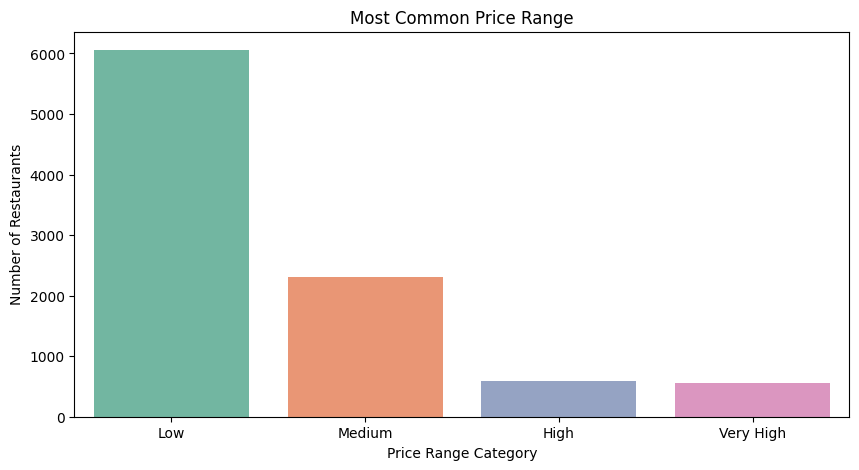

In [4]:
plt.figure(figsize=(10, 5))
sns.barplot(x=most_common_price_range.index, y=most_common_price_range.values, palette='Set2')
plt.title('Most Common Price Range')
plt.xlabel('Price Range Category')
plt.ylabel('Number of Restaurants')
plt.show()

- The `pd.cut()` function is used to create price range categories.
- `value_counts()` calculates the frequency of each price range, showing which one is most common.

 Calculate average rating for each price range category

In [6]:
avg_rating_per_price_range = DATASET.groupby('Price Range Category')['Aggregate rating'].mean().round(2)

print("Average rating for each price range:")
print(avg_rating_per_price_range)

Average rating for each price range:
Price Range Category
Low          2.32
Medium       3.06
High         3.64
Very High    3.67
Name: Aggregate rating, dtype: float64


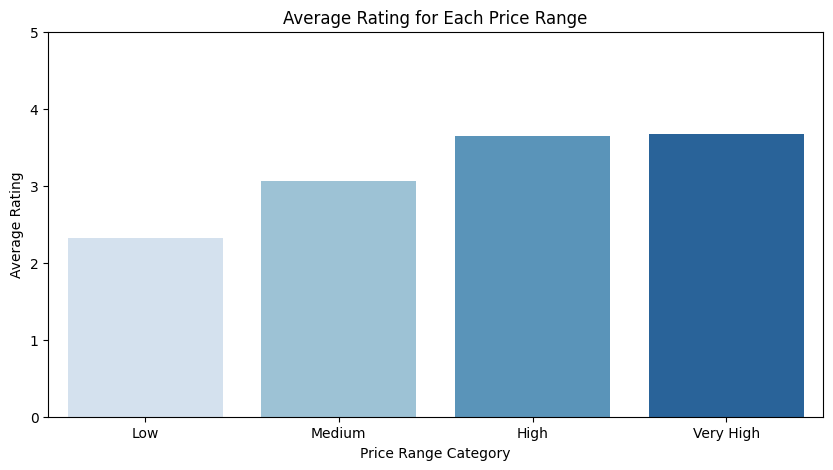

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rating_per_price_range.index, y=avg_rating_per_price_range.values, palette='Blues')
plt.title('Average Rating for Each Price Range')
plt.xlabel('Price Range Category')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Setting limit for ratings (typically from 0 to 5)
plt.show()

- The `groupby()` method groups the data by `Price Range Category` and calculates the mean `Aggregate rating`.
- The bar chart helps visualize the average ratings across price ranges.

> Find the color associated with the highest average rating in each price range

In [8]:
highest_avg_color_per_price_range = DATASET.groupby('Price Range Category')['Rating color'].agg(lambda x: x.value_counts().idxmax())

In [9]:
print("Color representing the highest average rating for each price range:")
print(highest_avg_color_per_price_range)

Color representing the highest average rating for each price range:
Price Range Category
Low          Orange
Medium       Orange
High         Yellow
Very High    Yellow
Name: Rating color, dtype: object


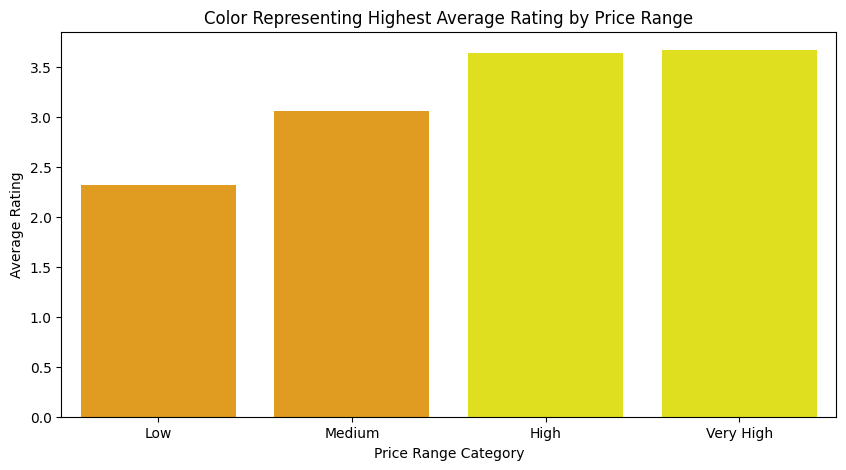

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x=highest_avg_color_per_price_range.index, y=avg_rating_per_price_range.values, palette=highest_avg_color_per_price_range.values)
plt.title('Color Representing Highest Average Rating by Price Range')
plt.xlabel('Price Range Category')
plt.ylabel('Average Rating')
plt.show()

- `groupby()` is used with `agg()` to find the most common `Rating color` for each `Price Range Category`.
- The bar chart uses colors representing the highest average rating for better visualization.